## Introduction to Jupyter, Python, and Discrete Probability models

# Importing Libraries

In [16]:
# Import all necessary libraries. Run this cell: Ctrl+Enter 
# You don't need to know this
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual 
from IPython.display import Image, display
from prob import *
import collections

# Getting a feeling for probability

<img src='DinoCoinFlipAnimation.gif' width='300' height='250'>

TODO: give directions for using this widget

# Natasha comment:  adding explaination about the random function in python will make students understand where does the outcome come from, so students can understand that this is an simulation situation which could be different from the theory they learned from the class.

In [17]:
interact_manual(flip_coins, trials=(1,100));

interactive(children=(IntSlider(value=50, description='trials', min=1), Button(description='Run Interact', sty…

TODO: give directions for using this widget

In [18]:
interact_manual(flip_coins_pairs, trials=(1,100));

interactive(children=(IntSlider(value=50, description='trials', min=1), Button(description='Run Interact', sty…

TODO: give directions for using this widget

In [19]:
interact_manual(flip_coins_triples, trials=(1, 100));

interactive(children=(IntSlider(value=50, description='trials', min=1), Button(description='Run Interact', sty…

TODO: give directions for using this widget

# Natasha comment: students can apply random() function to learn how to use it 

In [23]:
#  random.randint(a, b)
# Return a random integer N such that a <= N <= b.

import random
print (random.randint(5, 10))


6


In [24]:
# now you try to return a random integer between 10 to 20


# Natasha comment: I am not very familiar with bias in probability, so I don't know what feedback could be helpful about this topic. 

In [5]:
# this doesn't need to be included. We could just remove it.
#interact_manual(flip_coins_biased, trials=(1,50), heads_bias=(0.0,1.0,0.05));

TODO: introduce radar detector

<!-- image source: https://ocw.mit.edu/resources/res-6-012-introduction-to-probability-spring-2018/part-i-the-fundamentals/MITRES_6_012S18_L02.pdf -->
<img src='radar.png' width='500' height='500'>

TODO: give directions for using this widget

In [6]:
interact_manual(radar_dectector, detections=[10,100,1000]);

interactive(children=(Dropdown(description='detections', options=(10, 100, 1000), value=10), Button(descriptio…

<img src='montyhalldoors.png' width='400' height='300'>

TODO: give directions for using this widget

In [7]:
interact_manual(monty_hall_sim_interactive, guess=[1,2,3], change = ["Yes", "No"]);

interactive(children=(Dropdown(description='guess', options=(1, 2, 3), value=1), Dropdown(description='change'…

TODO: give directions for using this widget

In [8]:
interact_manual(monty_hall_sim, numdoors=(3,100), numgames=(10,100));

interactive(children=(IntSlider(value=51, description='numdoors', min=3), IntSlider(value=55, description='num…

## Data Science with Fashion on Instagram ##

In [9]:
# data source from: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/K7AW6F
fashion_data = pd.read_csv('fashiondataonInstagram.csv')

In [10]:
fashion_data.describe()
fashion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24752 entries, 0 to 24751
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UserId                  24752 non-null  object 
 1   Followings              24752 non-null  float64
 2   Followers               24752 non-null  float64
 3   MediaCount              24752 non-null  int64  
 4   BrandName               24752 non-null  object 
 5   BrandCategory           24752 non-null  object 
 6   Hashtags                24606 non-null  object 
 7   Caption                 24717 non-null  object 
 8   ImgURL                  24752 non-null  object 
 9   Likes                   24752 non-null  int64  
 10  Comments                24752 non-null  int64  
 11  CreationTime            24752 non-null  int64  
 12  Link                    24752 non-null  object 
 13  Selfie                  24752 non-null  float64
 14  BodySnap                24752 non-null

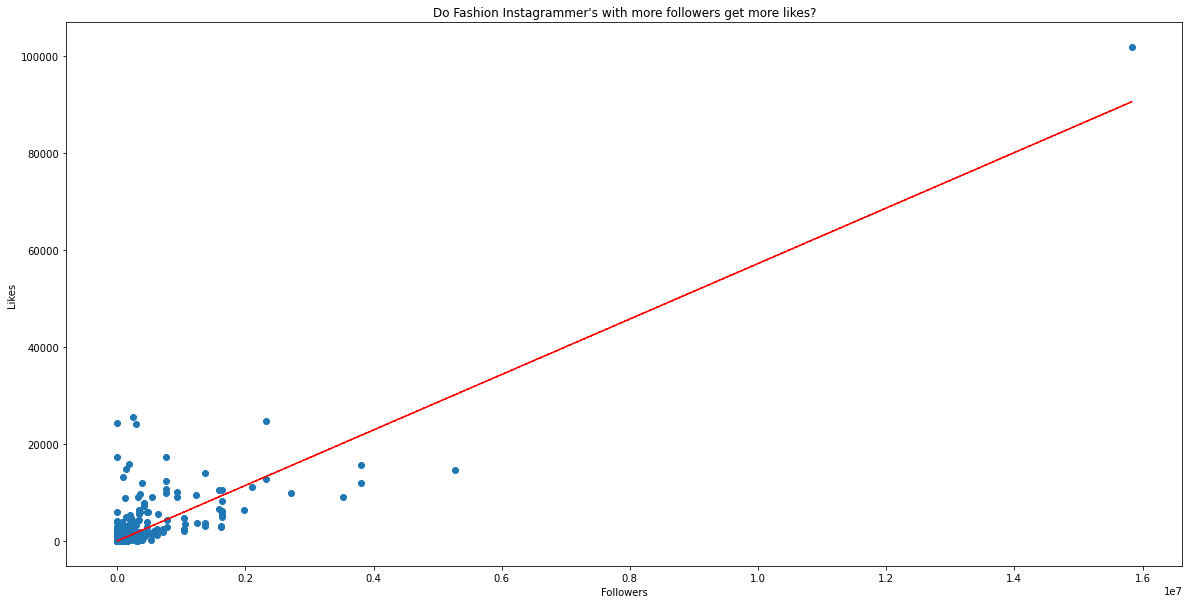

The correlation between likes and followers is 0.8453567368737612 which is almost 1, so they are related


In [11]:
followers = fashion_data['Followers']
likes = fashion_data['Likes']
followers_likes_corr = followers.corr(likes)

fig = plt.figure(num=1, figsize=(20, 10))  
axes = fig.add_subplot(1, 1, 1)
axes.set_xlabel('Followers')
axes.set_ylabel('Likes')
axes.set_title('Do Fashion Instagrammer\'s with more followers get more likes?')
axes.plot(followers, likes, '*')
# https://stackoverflow.com/questions/41635448/how-can-i-draw-scatter-trend-line-on-matplot-python-pandas/41635626
plt.scatter(followers,likes)
fit = np.polyfit(followers, likes, 1)
fit = np.poly1d(fit)
plt.plot(followers,fit(followers),"r--")
plt.show()

print("The correlation between likes and followers is " + str(followers_likes_corr) + " which is almost 1, so they are related" )

In [12]:
print("The mean 'like' value is: " + str(likes.mean()))
print("The standard deviation is: " + str(likes.std()))

#TODO: make a histogram of likes

The mean 'like' value is: 101.62213154492567
The standard deviation is: 871.0110606292682


# Natasha comment: This could be an good place to let students try to apply .mean()  , .std() methods , since you have demonstrated it in the above example. step1: explain how .mean(),  .std() methods work and how to use them, step2: Students apply them to analyze the correlation likes and happiness


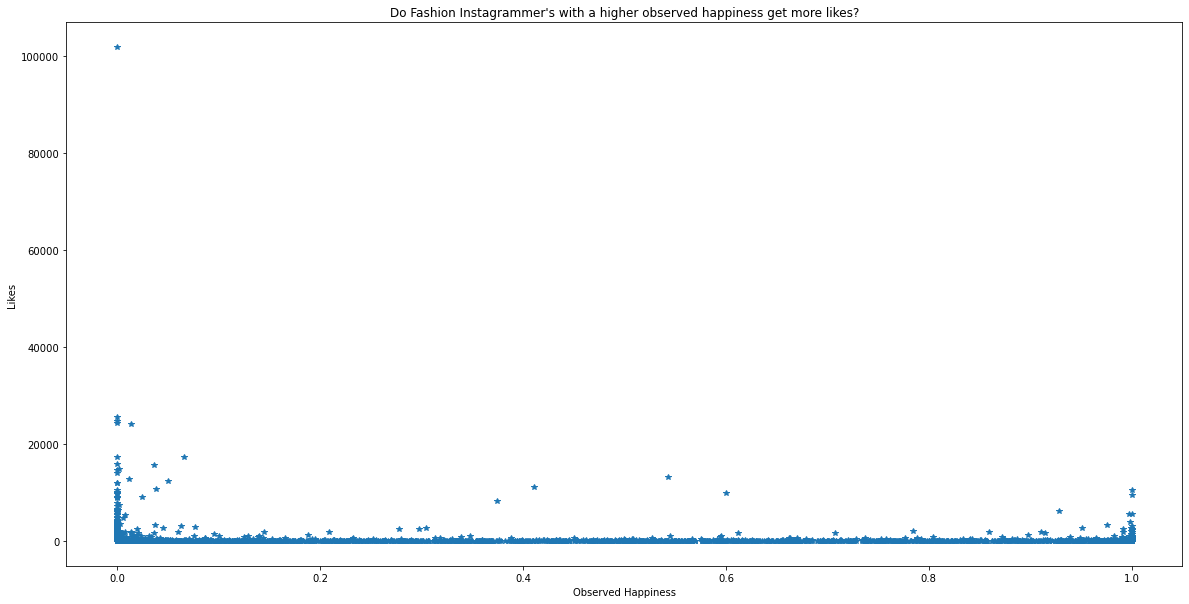

The correlation between likes and happiness is 0.015491119083931632 which is almost 0, so they are most likely
not related


In [13]:
happiness = fashion_data['Happiness']

fig = plt.figure(num=1, figsize=(20, 10))  
axes = fig.add_subplot(1, 1, 1)  # one by one 
axes.set_xlabel('Observed Happiness')
axes.set_ylabel('Likes')
axes.set_title('Do Fashion Instagrammer\'s with a higher observed happiness get more likes?')
axes.plot(happiness,  likes, '*')
plt.show()

happiness_likes_corr = happiness.corr(likes)
print("The correlation between likes and happiness is " + str(happiness_likes_corr) + " which is almost 0, so they are most likely\nnot related" )

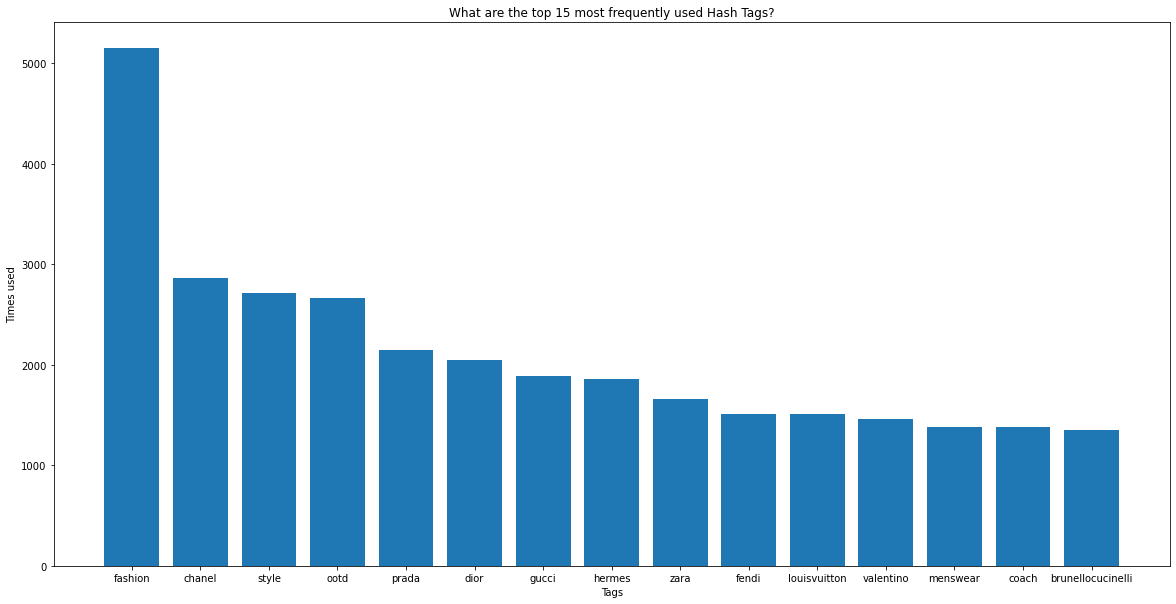

In [14]:
# what are the most common hash tags?
hash_tags = fashion_data['Hashtags'].astype(str)
counter = collections.Counter()

for tag_set in hash_tags:
    tags = tag_set.split(', ')
    for tag in tags:
        if '\\' not in tag:
            counter[tag] += 1
most_common_hash_tags = collections.OrderedDict(sorted(counter.items(), key=lambda t: t[1], reverse=True))
sorted_common_hash_tags = pd.DataFrame.from_dict(most_common_hash_tags, orient='index').reset_index()
sorted_common_hash_tags.describe()
sorted_common_hash_tags = sorted_common_hash_tags.head(15)
fig = plt.figure(num=1,figsize=(20, 10))  
axes = fig.add_subplot(1, 1, 1)  # one by one 
axes.set_xlabel('Tags')
axes.set_ylabel('Times used')
axes.set_title('What are the top 15 most frequently used Hash Tags?')
sorted_common_hash_tags = sorted_common_hash_tags.rename(columns= {'index' : 'tag', 0 : 'frequency'})
axes.bar(sorted_common_hash_tags['tag'], sorted_common_hash_tags['frequency']);
